# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [1]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     -------------- ----------------------- 256.0/675.6 kB 5.3 MB/s eta 0:00:01
     ------------------------------- ------ 563.2/675.6 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=bd16b7e08f999314e36c1f99cc1d545a4976ec80f374e19e91cbc621fed8ae49
  Stored in directory: c:\users\16476\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"q=" + city+ "&appid=" + weather_api_key + "&units=" + units
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | cable beach
City not found. Skipping...
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | san rafael
Processing Record 8 of Set 1 | lockwood
Processing Record 9 of Set 1 | maralal
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | polyarnyy
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | bu'

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,15.24,87,0,1.54,US,1696302578
1,lata,40.1629,-8.3327,16.15,95,2,1.28,PT,1696302578
2,puerto natales,-51.7236,-72.4875,2.90,96,100,1.90,CL,1696302579
3,wailua homesteads,22.0669,-159.3780,27.24,79,40,3.60,US,1696302579
4,san rafael,-34.6177,-68.3301,15.62,30,97,4.60,AR,1696302579


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,15.24,87,0,1.54,US,1696302578
1,lata,40.1629,-8.3327,16.15,95,2,1.28,PT,1696302578
2,puerto natales,-51.7236,-72.4875,2.90,96,100,1.90,CL,1696302579
3,wailua homesteads,22.0669,-159.3780,27.24,79,40,3.60,US,1696302579
4,san rafael,-34.6177,-68.3301,15.62,30,97,4.60,AR,1696302579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

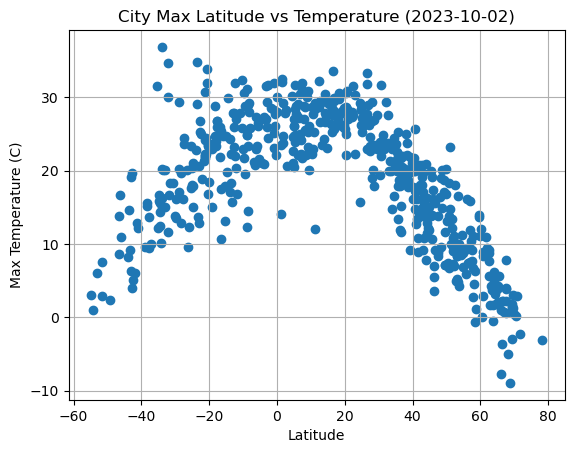

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

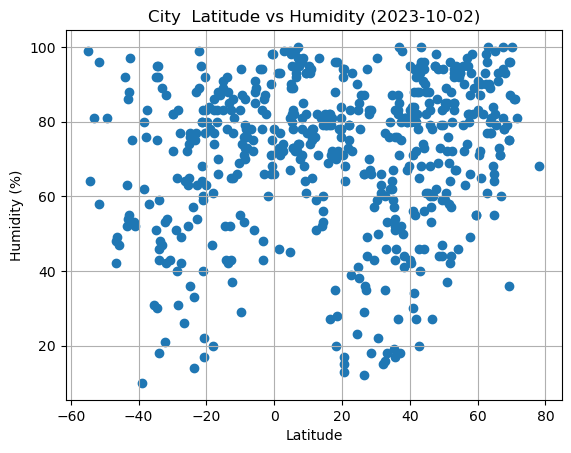

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City  Latitude vs Humidity (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

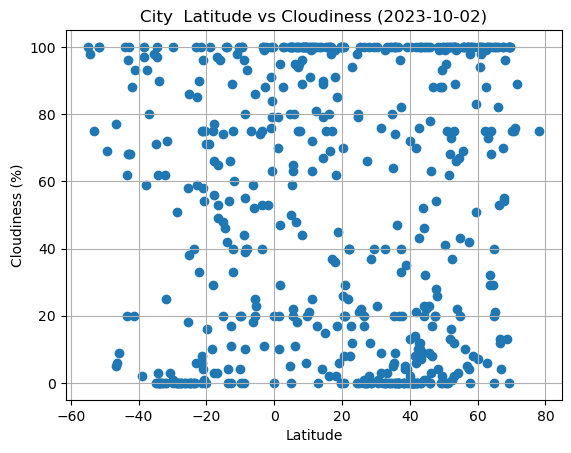

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City  Latitude vs Cloudiness (2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

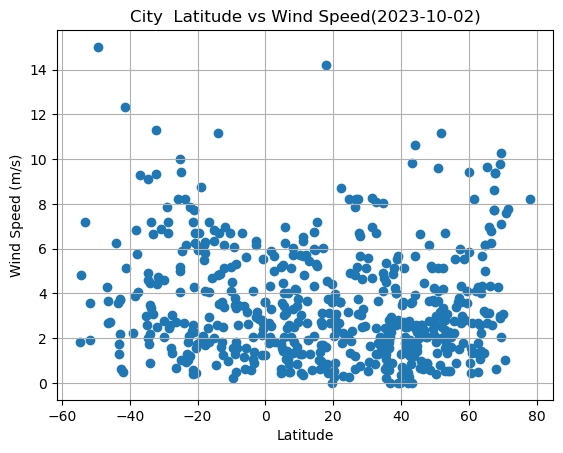

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])


# Incorporate the other graph properties
plt.title("City  Latitude vs Wind Speed(2023-10-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plotLinearRegression(x_values,y_values,title,text_position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_values,"r-")
    plt.annotate(line_text,text_position,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r- value is : {rvalue**2}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0] 
pd.DataFrame(northern_hemi_df)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,15.24,87,0,1.54,US,1696302578
1,lata,40.1629,-8.3327,16.15,95,2,1.28,PT,1696302578
3,wailua homesteads,22.0669,-159.3780,27.24,79,40,3.60,US,1696302579
5,lockwood,45.8191,-108.4149,13.94,83,100,2.57,US,1696302579
6,maralal,1.0968,36.6980,14.07,72,70,2.66,KE,1696302579


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0] 
pd.DataFrame(southern_hemi_df)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,2.90,96,100,1.90,CL,1696302579
4,san rafael,-34.6177,-68.3301,15.62,30,97,4.60,AR,1696302579
7,invercargill,-46.4000,168.3500,16.68,49,6,2.68,NZ,1696302579
10,port-aux-francais,-49.3500,70.2167,2.41,81,69,15.02,TF,1696302580
13,saldanha,-33.0117,17.9442,15.01,89,0,6.64,ZA,1696302580


###  Temperature vs. Latitude Linear Regression Plot

The r- value is : 0.7574558324050107


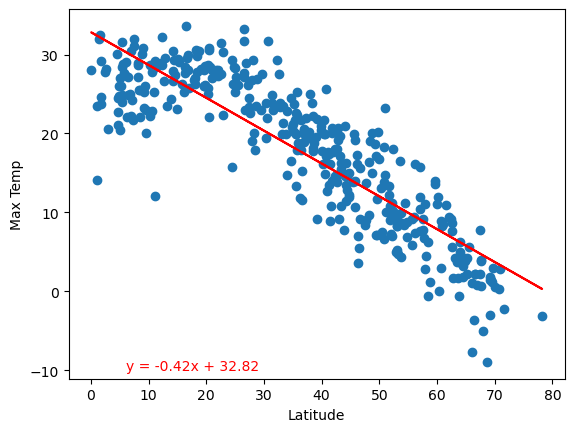

In [55]:
# Linear regression on Northern Hemisphere
plotLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",(6,-10))
plt.show()

The r- value is : 0.46279988276921763


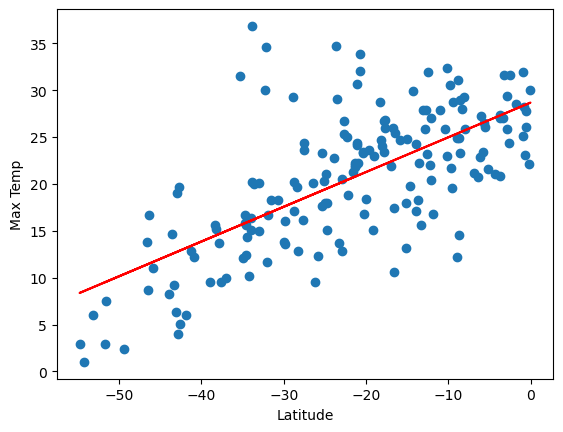

In [56]:
# Linear regression on Southern Hemisphere
plotLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",(-50,40))
plt.show()

**Discussion about the linear relationship:** The  data of northern_hemi_df is more coralated (has good corelation) as the value of r is more than 0.5, whereas the southern_hemi_df is moderately coralated (has average corelation) as the value of r is closer to 0.5

### Humidity vs. Latitude Linear Regression Plot

The r- value is : 0.004547803321856111


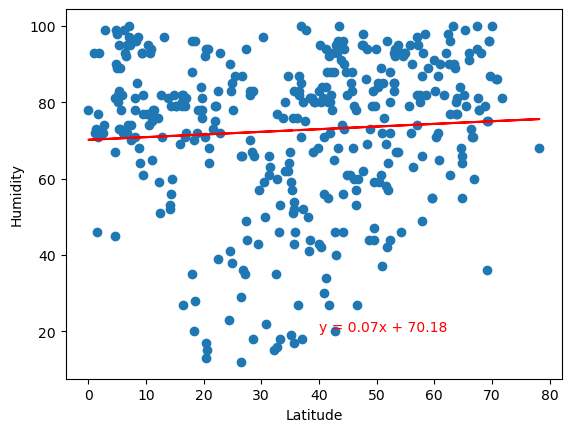

In [57]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",(40,20))
plt.show()


The r- value is : 0.03887237516760264


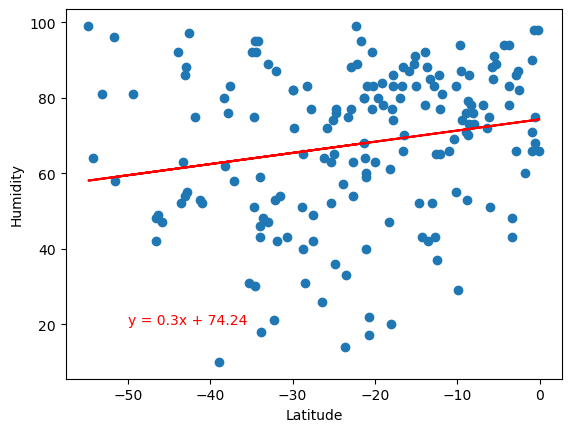

In [58]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",(-50,20))
plt.show()


**Discussion about the linear relationship:** The data in Northern Hemisphere is has very weak corelation as it's very less than 0.5, whereas the data for Southern Hemisphere has no corelation at all as it's 0

### Cloudiness vs. Latitude Linear Regression Plot

The r- value is : 0.00034917511251309066


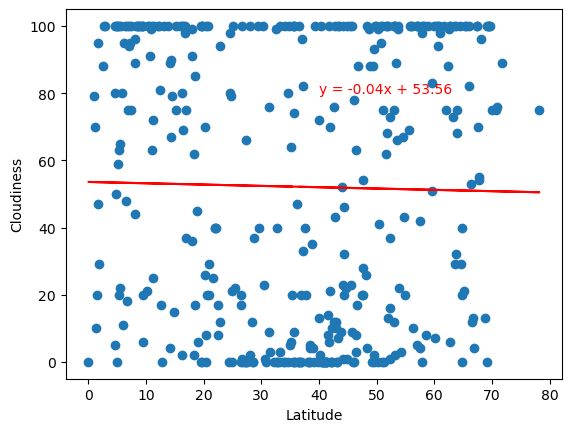

In [59]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",(40,80))
plt.show()


The r- value is : 0.0022640161291817918


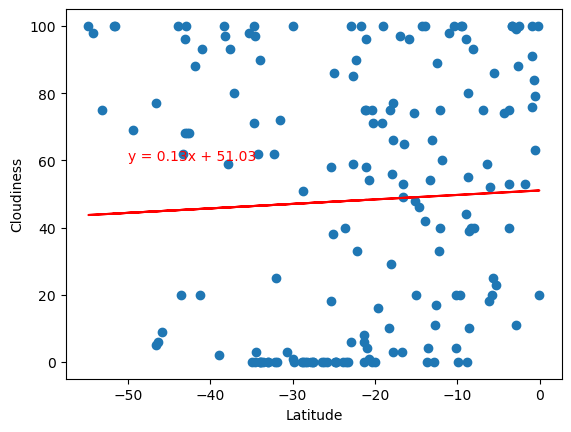

In [60]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",(-50,60))
plt.show()


**Discussion about the linear relationship:** The northern Hemisphere data has no corelation as the value of r is 0 whereas the Southern Hemisphere data also has poor corelation as its also 0.01 which is very less than 0.5

### Wind Speed vs. Latitude Linear Regression Plot

The r- value is : 0.013240855052059922


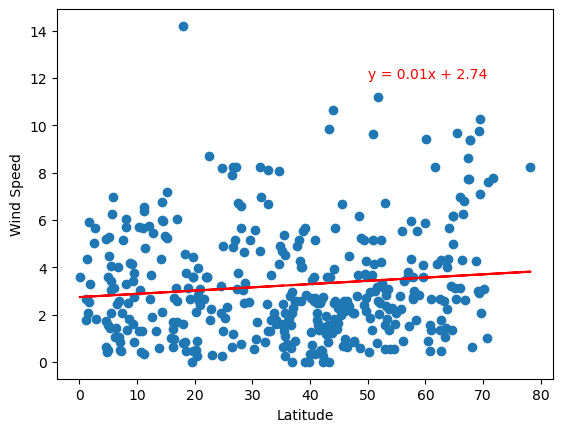

In [61]:
# Northern Hemisphere
plotLinearRegression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",(50,12))
plt.show()


The r- value is : 0.03294609655871086


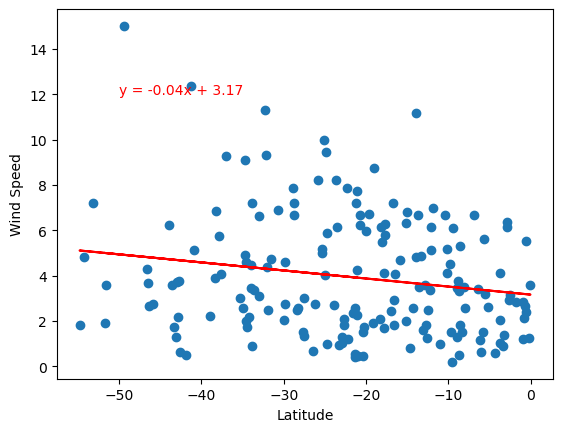

In [62]:
# Southern Hemisphere
plotLinearRegression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",(-50,12))
plt.show()



**Discussion about the linear relationship:** For wind speed and latitude there is no corelation in both the Northern Hemisphere and the Southern Hemisphere as the value of r is 0 in both cases